# Импорт библиотек и загрузка данных

In [89]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from scipy import stats

Загружен уже очищенный в прошлом задании датасет

In [8]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean.csv


In [93]:
df = pd.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


# Визуализация

Гистограмма показывающая наиболее частый возраст машин в зависимости от типа передачи

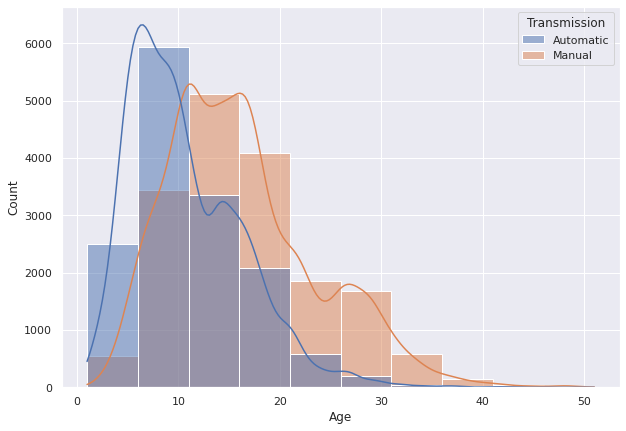

In [25]:
plt.figure(figsize=(10,7))
sns.histplot(    
    data=df,
    x="Age",
    hue="Transmission",
    bins=10,
    kde=True  
    );

Скаттерограмма с зависимостью цены от возраста, а ещё с пробегом и типом передачи

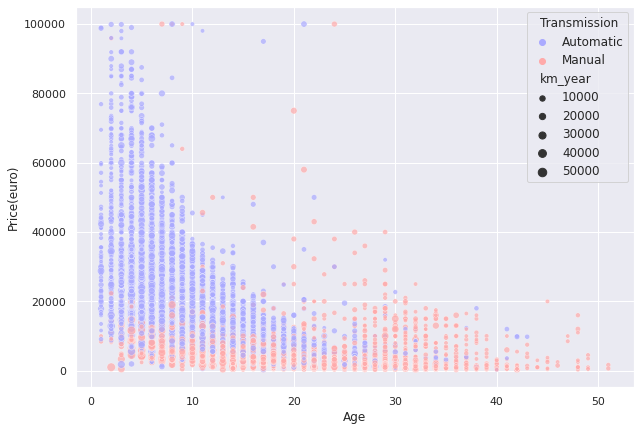

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Age", y="Price(euro)",
    hue="Transmission", 
    size = "km_year", alpha = 0.7,
             palette='bwr'
    );

Скаттерограмма с зависимостью цены от объёма двигателя с разделением на тип топлива

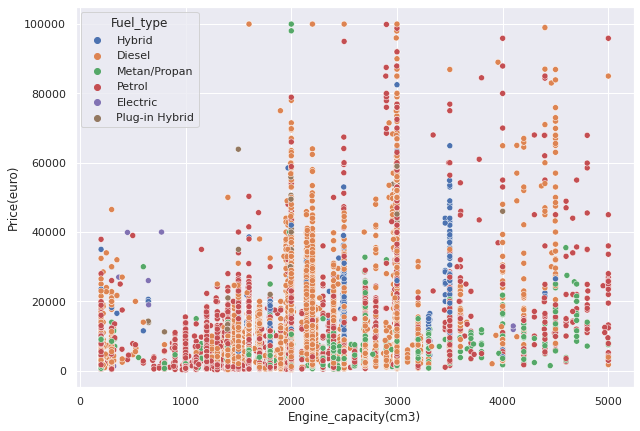

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Engine_capacity(cm3)", y="Price(euro)",
    hue="Fuel_type", 
    );

# Добавление дополнительных признаков

**Квантильные категории для столбца "удельный пробег за год"**

Введена новая колонка "mileage" куда записывается значение big если пробег за год больше 25 000, small если он меньше 10 000 и medium если он между 10 000 и 25 000

In [97]:
conditions = [(df['km_year'] <= 10000), (df['km_year'] >= 25000)]
values = ['small', 'big']
df['mileage'] = np.select(conditions, values, default='medium')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
 11  mileage               32220 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


Если стоимость автомобиля меньше 3000 (цифры взяты наугад), то его производитель заменяется на Rare_cheap. А если его стоимость больше 30 000, то на Rare_expencive

In [98]:
df.loc[df['Price(euro)'] < 3000, 'Make'] = 'Rare_cheap'
df.loc[df['Price(euro)'] > 30000, 'Make'] = 'Rare_expensive'

In [99]:
counts = df.Make.value_counts()

counts

Rare_cheap        6142
Toyota            2863
Volkswagen        2652
Mercedes          2343
BMW               1993
Renault           1936
Skoda             1601
Rare_expensive    1146
Opel              1125
Audi              1118
Ford              1079
Dacia             1049
Hyundai            995
Nissan             991
Honda              747
KIA                547
Lexus              537
Volvo              466
Mitsubishi         446
Chevrolet          246
Mazda              238
Land Rover         215
Peugeot            207
Citroen            174
Seat               173
Vaz                141
Subaru             138
Rare               123
Suzuki             107
Fiat               106
Porsche             79
Mini                68
Infiniti            66
Jeep                65
Jaguar              49
Lincoln             47
Chrysler            46
Dodge               44
Alfa Romeo          24
Ssangyong           24
Smart               18
Rover               12
Daihatsu            12
GAZ        

# Предварительная обработка данных

Стандартизация

In [100]:
df['Distance'] =( df['Distance'] - df['Distance'].mean() ) / df['Distance'].std()
df['Year'] =( df['Year'] - df['Year'].mean() ) / df['Year'].std()
df['Engine_capacity(cm3)'] =( df['Engine_capacity(cm3)'] - df['Engine_capacity(cm3)'].mean() ) / df['Engine_capacity(cm3)'].std()
df['Price(euro)'] =( df['Price(euro)'] - df['Price(euro)'].mean() ) / df['Price(euro)'].std()
df['Age'] =( df['Age'] - df['Age'].mean() ) / df['Age'].std()
df['km_year'] =( df['km_year'] - df['km_year'].mean() ) / df['km_year'].std()

Нормализация

In [85]:
df_max_scaled = df.copy()
df_max_scaled['Distance'] = df_max_scaled['Distance'] /df_max_scaled['Distance'].abs().max()
df_max_scaled['Year'] = df_max_scaled['Year'] /df_max_scaled['Year'].abs().max()
df_max_scaled['Engine_capacity(cm3)'] = df_max_scaled['Engine_capacity(cm3)'] /df_max_scaled['Engine_capacity(cm3)'].abs().max()
df_max_scaled['Price(euro)'] = df_max_scaled['Price(euro)'] /df_max_scaled['Price(euro)'].abs().max()
df_max_scaled['Age'] = df_max_scaled['Age'] /df_max_scaled['Age'].abs().max()
df_max_scaled['km_year'] = df_max_scaled['km_year'] /df_max_scaled['km_year'].abs().max()

Степенное преобразование (Box-Cox)

In [96]:
stats.boxcox(df['Distance'])
stats.boxcox(df['Year'])
stats.boxcox(df['Engine_capacity(cm3)'])
stats.boxcox(df['Price(euro)'])
stats.boxcox(df['Age'])
stats.boxcox(df['km_year'])

(array([1640.99782174, 1583.46034517, 1161.32663169, ..., 1289.82565176,
        1989.41304406, 1709.04439953]), 0.72377945989018)

Ordinal / One-Hot Encoding

In [106]:
pd.get_dummies(df.Make)
pd.get_dummies(df.Model)
pd.get_dummies(df.Style)
pd.get_dummies(df.Fuel_type)
pd.get_dummies(df.Transmission)
pd.get_dummies(df.mileage)

,big,medium,small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
32215,0,1,0
32216,0,1,0
32217,0,1,0
32218,0,1,0
